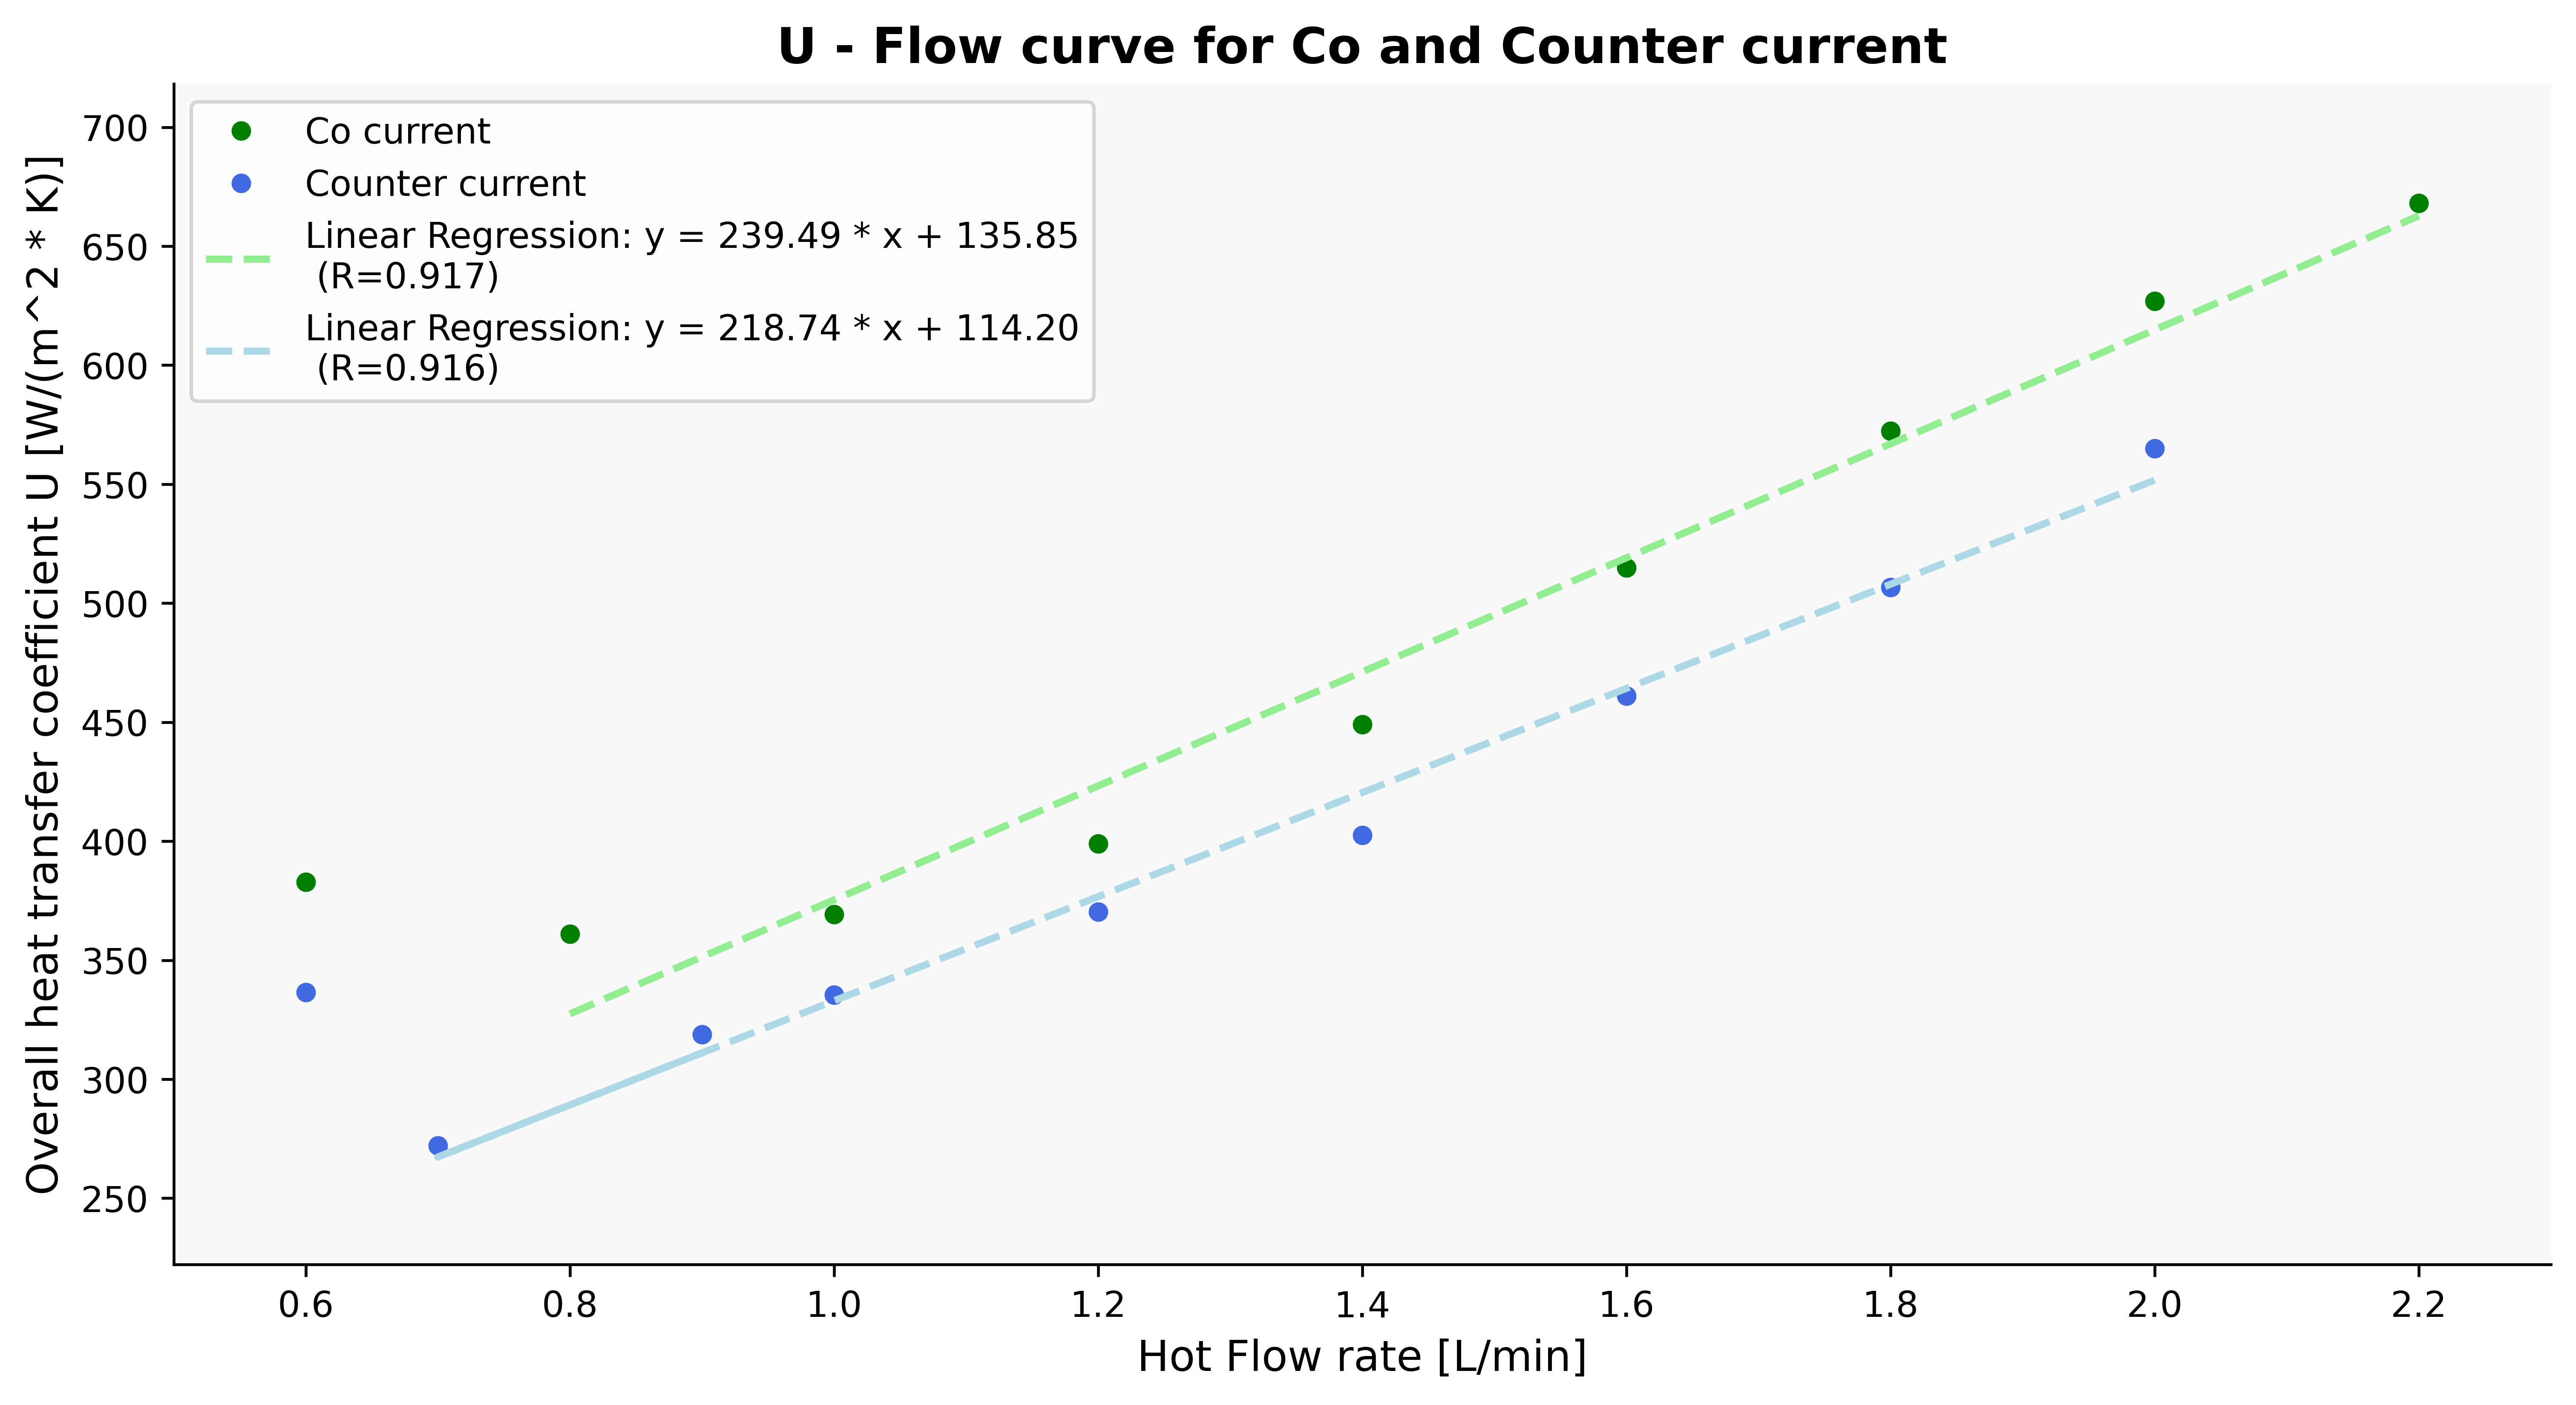

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy
from scipy.stats import linregress
from scipy.optimize import curve_fit


def read_excel_data(file_path):
    df = pd.read_excel(file_path, sheet_name="Feuil1", skiprows=1)
    return df

def plot_graph(data1_frame, data2_frame):
    #Co current data
    stx1 = data1_frame['SC-1 [L/min]'][0:9].tolist() #co
    sty1 = data1_frame['U [J/K*m2*s]'][0:9].tolist() #co
    #Counter current data
    stx2 = data2_frame['SC-1'][0:9].tolist() #counter
    sty2 = data2_frame['U'][0:9].tolist() #counter
    
    #Convert to float
    x1 = [float(x) for x in stx1]
    y1 = [float(x) for x in sty1]
    x2 = [float(x) for x in stx2]
    y2 = [float(x) for x in sty2]
    

    plt.figure(figsize=(12, 6), dpi=600)  # Adjust figure size for better presentation; dpi:resolution of the image 

    # Plot data with specific style elements
    plt.plot(x1, y1, label='Co current', color='green', linestyle='', marker='.', markersize=9, linewidth=1.5)
    plt.plot(x2, y2, label='Counter current', color='royalblue', linestyle='', marker='.', markersize=9, linewidth=1.5)

    plt.xlabel('Hot Flow rate [L/min]', fontsize=12)
    plt.ylabel('Overall heat transfer coefficient U [W/(m^2 * K)]', fontsize=12)
    plt.title('U - Flow curve for Co and Counter current', fontsize=14, weight='bold')

    # Round x-axis ticks to two decimal places
    #rounded_ticks = [round(float(val), 2) for val in x]
    #plt.xticks(ticks=rounded_ticks, fontsize=10)
    # Adjust grid density
    plt.xticks(ticks=plt.xticks()[0][::1], fontsize=10, rotation ='horizontal')
    plt.yticks(ticks=plt.yticks()[0][::1], fontsize=10)

    plt.grid(False)

    # Add a subtle background color
    plt.gca().set_facecolor('#f9f9f9')

    # Remove spines for cleaner appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Invert y-axis
    #plt.gca().invert_yaxis()
    
     # Set x-axis and y-axis limits
    delta_x=0.1
    delta_y=50
    plt.xlim(min(min(x1),min(x2))-delta_x, max(max(x1),max(x2))+delta_x)
    plt.ylim(min(min(y1),min(y2))-delta_y, max(max(y1),max(y2))+delta_y)
    
    
    #Linear regressions
    fit_params1 = np.polyfit(x1[1:9], y1[1:9], 1)
    fit_params2 = np.polyfit(x2[0:7]+x2[8:9], y2[0:7]+y2[8:9], 1)
    
    fit_line1 = [(fit_params1[0] * x + fit_params1[1]) for x in x1[1:9]]
    fit_line2 = [(fit_params2[0] * x + fit_params2[1]) for x in x2[0:7]+x2[8:9]]
    
    # Display fitting curve equation
    R1 = (np.corrcoef(x1, y1)[0,1])**2
    R2 = (np.corrcoef(x2, y2)[0,1])**2
    
    equation1 = f'y = {fit_params1[0]:.2f} * x + {fit_params1[1]:.2f}'
    equation2 = f'y = {fit_params2[0]:.2f} * x + {fit_params2[1]:.2f}'

    #plt.text(1, 12, equation, fontsize=8, color='green', verticalalignment='top')
    
    # Plot logarithmic fitting line
    plt.plot(x1[1:9], fit_line1, label=f'Linear Regression: {equation1}\n (R={R1:.3f})', color='lightgreen', linestyle='--', linewidth=2)
    plt.plot(x2[0:7]+x2[8:9], fit_line2, label=f'Linear Regression: {equation2}\n (R={R2:.3f})', color='lightblue', linestyle='--', linewidth=2)
    
    
    
   
    
    
    
    plt.legend()
    
   
    
def save_svg(file_path):
    plt.savefig(file_path + ".png", format='png')  # Save as a PNG file for matplotlib
    plt.savefig(file_path + ".svg", format='svg')  # Save as an SVG file for vector format

def main():
    excel_file_path1 = r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-1_Q/Res_Co.xlsx"
    excel_file_path2 = r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-1_Q/Res_Counter.xlsx"

    download_folder =r"C:/Users/nilst/Documents/EPFL/BA_4/TP_ENG/TP-1_Q/"

    # Read data from Excel file
    data1 = read_excel_data(excel_file_path1) #Co current
    data2 = read_excel_data(excel_file_path2) #Counter current
    

    # Plot the graph
    plot_graph(data1, data2)
    
    # Save the graph as an SVG file and download it
    svg_file_path = os.path.join(download_folder, 'Figure_coefficient_U')
    save_svg(svg_file_path)
    
    plt.show()

if __name__ == "__main__":
    main()